Cálculo de Equilíbrio de Fases da Mistura Água e Acetona
Utilizando modelo de energia livre NRTL

Referência para parâmetros do modelo:

1- Understanding Distillation Using Column Profile Maps, Author(s): Daniel Beneke, Mark Peters, David Glasser, Diane Hildebrandt

http://onlinelibrary.wiley.com/doi/10.1002/9781118477304.app2/pdf

2- "Vapor-liquid equilibrium of water-acetone-air at ambient temperatures and pressures. An analysis of different VLE-fitting methods" Jan H. Lichtenbelt, Bob J. Schram, Ind. Eng. Chem. Process Des. Dev., 1985, 24 (2), pp 391–397

http://pubs.acs.org/doi/abs/10.1021/i200029a029




In [1]:
import numpy as np

In [2]:
#temperatura e composições preliminares
T = 373
x = np.array([0.3,0.7])

In [3]:
def NRTL(x,T):
    
    alfa11 = alfa22 = 0
    alfa12 = 0.3
    alfa21 = 0.3

    a11 = 0
    a12 = 0.054
    a21 = 6.398
    a22 = 0
    #Matriz aij
    aij = np.array([[a11,a12],[a21,a22]])
    #print (aij)
    b11 = 0
    b12 = 420
    b21 = -1809
    b22 = 0
    #matriz bij
    bij = np.array([[b11,b12],[b21,b22]])
    #print (bij)
    
    alfa = np.array([[alfa11,alfa12],[alfa21,alfa22]])
    tau=np.zeros([2,2])
    for j in range(2):
        for i in range(2):
    
            tau[j,i]=aij[j,i]+bij[j,i]/T
            
    G = np.zeros([2,2])
    for j in range(2):
        for i in range(2):
            G[j,i] = np.exp(-alfa[j,i]*tau[j,i])
            
    Gamma=np.zeros([2])
    for i in range(2):

        Sj1=0
        Sj2=0
        Sj3=0
        for j in range(2):
            Sj1     += tau[j,i]*G[j,i]*x[j]
            Sj2     += G[j,i]*x[j]

            Sk1=0
            Sk2=0
            Sk3=0
            for k in range(2):
                Sk1+=G[k,j]*x[k]
                Sk2+=x[k]*tau[k,j]*G[k,j]
                Sk3+=G[k,j]*x[k]

            Sj3     += ((x[j]*G[i,j])/(Sk1))*(tau[i,j]-(Sk2)/(Sk3))

        Gamma[i]=np.exp(-Sj1/Sj2 - Sj3)
    
    return Gamma


In [4]:
print ('Coeficientes de atividade')
print ('    Agua      Acetona')
print(NRTL(x,T))

Coeficientes de atividade
    Agua      Acetona
[ 0.35461064  0.80008441]


In [5]:
#Calculo de Psat com a Equação de Antoine
#Pressões de saturação para entrar em yi.Pbol = xi*Gammai*P_sati
#T = 373

def PantoineW(T):
    Aw = 16.3872
    Bw = 3885.70
    Cw = 230.170
    return (np.exp(Aw - Bw/(T-273 + Cw)))*1000
PsatAw = PantoineW(T)
print (PsatAw)

def PantoineA(T):
    Aa = 14.3145
    Ba = 2756.22
    Ca = 228.06
    return (np.exp(Aa - Ba/(T-273 + Ca)))*1000
PsatAa = PantoineA(T)
print (PsatAa)

101333.212771
369786.982543


In [6]:
import matplotlib.pyplot as plt
def Pbol(x,T):
    y_out = np.zeros(2)
    Gamma = NRTL(x,T)
    Psati = ([PsatAw,PsatAa])
    Pbol_=0
    for i in range(0,2):
#        print(i,Pbol_)
        Pbol_ += x[i]*Gamma[i]*Psati[i]
    
    #calculo das composicoes do vapor
    for i in range(0,2):
        y_out[i] = x[i]*Gamma[i]*Psati[i]/Pbol_
        
        
#    print(y_out, Gamma, x, Psati, Pbol_)
    return [y_out, Pbol_]



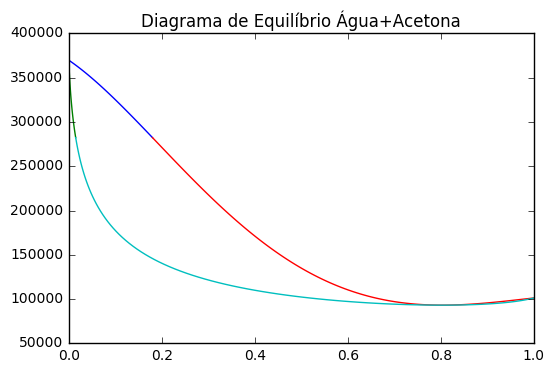

In [7]:
xwaxis = np.linspace (0,0.18,100)
P_axis = np.zeros(100)
ywaxis = np.zeros(100)
for i in range (0,100):
    xa = 1-xwaxis[i]
    x_ = [xwaxis[i],xa]
    
        
    y_, P_axis[i] = Pbol(x_,T)
    ywaxis[i] = y_[0]

plt.figure(1)
plt.plot(xwaxis,P_axis)
plt.plot(ywaxis,P_axis)

xwaxis = np.linspace (0.18,1,100)
P_axis = np.zeros(100)
ywaxis = np.zeros(100)
for i in range (0,100):
    xa = 1-xwaxis[i]
    x_ = [xwaxis[i],xa]
    
        
    y_, P_axis[i] = Pbol(x_,T)
    ywaxis[i] = y_[0]
plt.title('Diagrama de Equilíbrio Água+Acetona')
plt.plot(xwaxis,P_axis)
plt.plot(ywaxis,P_axis)

plt.show()

